In [5]:
import pandas as pd
import numpy as np
import json
import glob
import matplotlib.pyplot as plt
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [6]:
def payloads_from_json_log_single(filename):
    with open(filename, 'r') as f:
        for line in f:
            obj = json.loads(line)
            yield {
                "device_id": obj["end_device_ids"]["device_id"],
                "received_at": obj["received_at"],
                "gateway_id": [m["gateway_ids"]["gateway_id"] for m in obj["uplink_message"]["rx_metadata"]],
                **obj["uplink_message"].get("decoded_payload", {})
            } 
            

def payloads_from_json_log(fname_pattern):
    for fname in glob.glob(fname_pattern):
        yield from payloads_from_json_log_single(fname)

In [7]:
df = pd.DataFrame(payloads_from_json_log("/storage/stations/GEODOS/*.json"))
df["received_at"] = pd.to_datetime(df["received_at"])

In [4]:
df

,device_id,received_at,gateway_id,V,hits,mA,°C,Lat,Lon
0,geodos13,2021-12-05 12:55:46.897603881+00:00,[crreat2],3.90,1872.0,-16.0,19.0,NaN,NaN
1,geodos13,2021-12-06 08:20:22.389847423+00:00,[crreat2],3.79,1766.0,-17.0,19.0,NaN,NaN
2,geodos13,2021-12-06 08:37:26.295514500+00:00,[crreat2],3.78,1822.0,-16.0,19.0,NaN,NaN
3,geodos13,2021-12-06 08:54:24.583468074+00:00,[crreat2],3.78,1792.0,-17.0,19.0,NaN,NaN
4,geodos13,2021-12-06 09:11:24.481038758+00:00,[crreat2],3.78,1826.0,-17.0,19.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5035,geodosb2,2022-02-10 18:00:20.991951175+00:00,[crreat2],3.50,0.0,-70.0,6.0,NaN,NaN
5036,geodosb2,2022-02-10 18:00:54.274100819+00:00,[crreat2],NaN,NaN,NaN,NaN,49.2605,14.6922
5037,geodosb2,2022-02-10 18:01:31.087486119+00:00,[crreat2],3.51,0.0,-89.0,6.0,NaN,NaN
5038,geodosb2,2022-02-10 18:02:06.993386270+00:00,[crreat2],3.50,0.0,-72.0,6.0,NaN,NaN


/nix/store/zxs5gn3hwjycjcrgd6miw17db80g27ny-python3-3.8.9-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


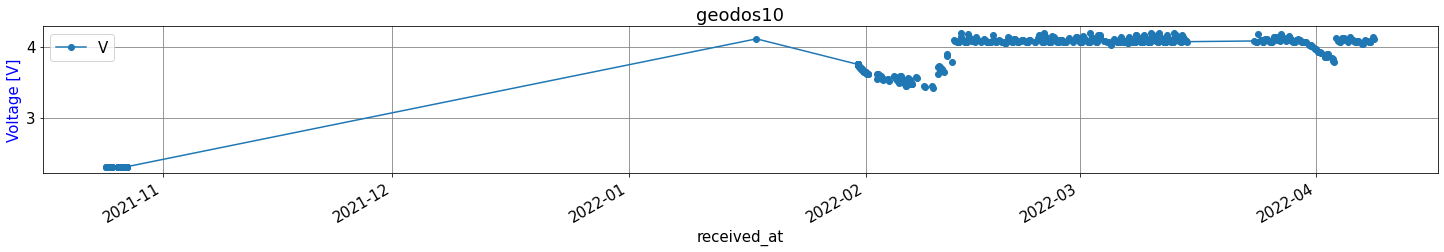

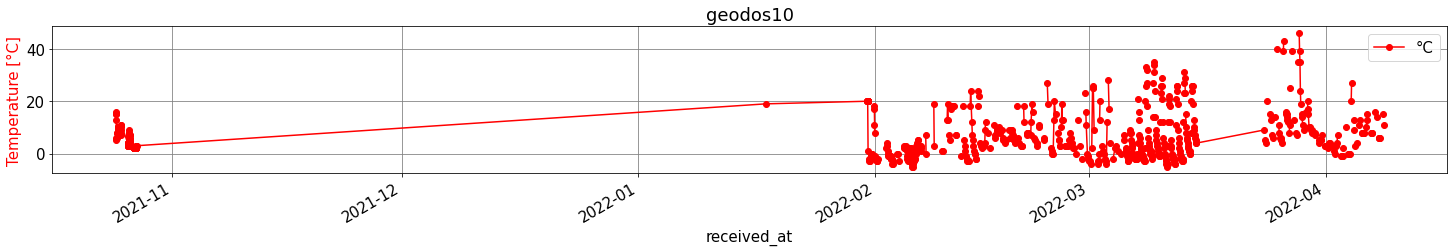

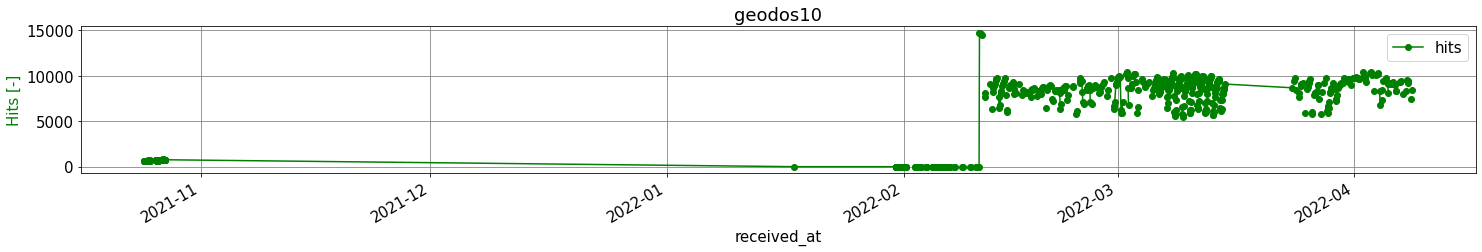

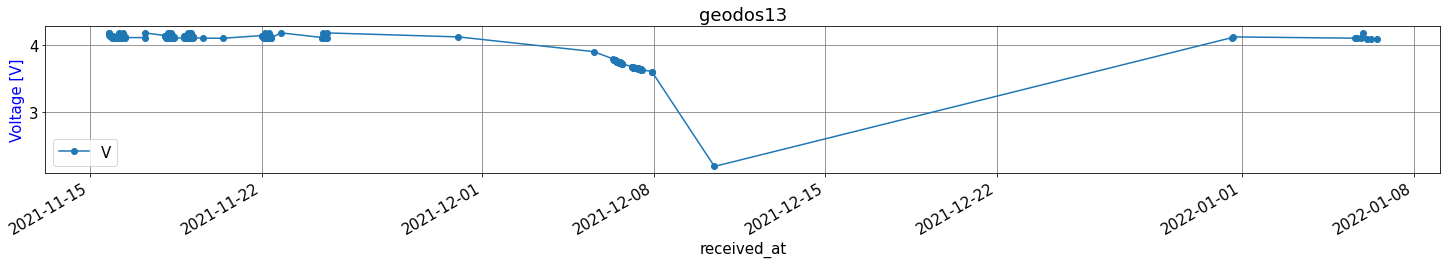

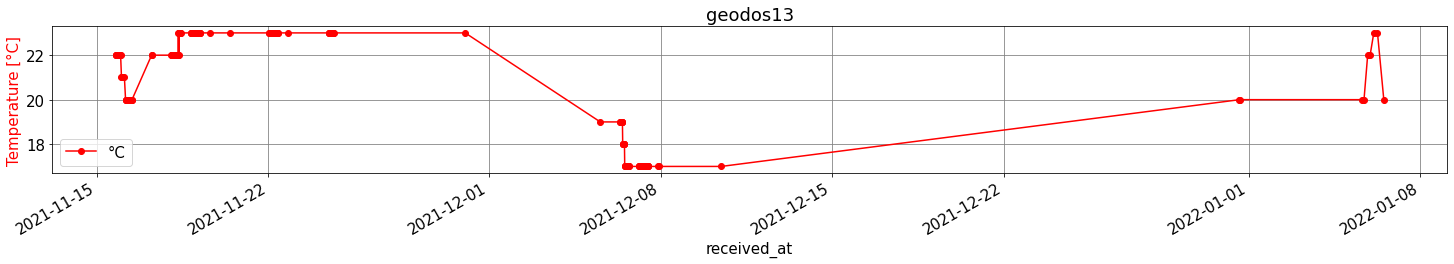

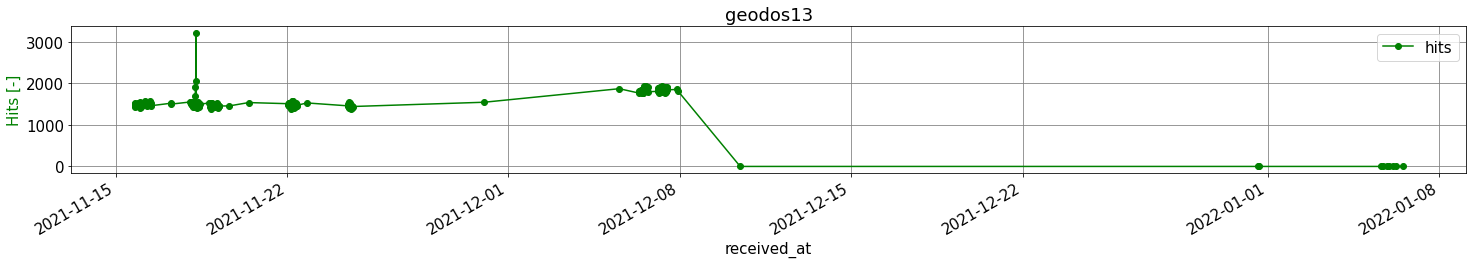

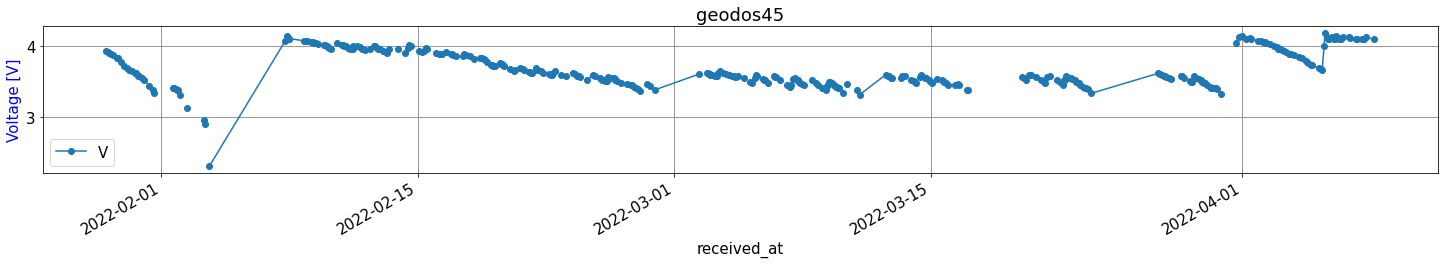

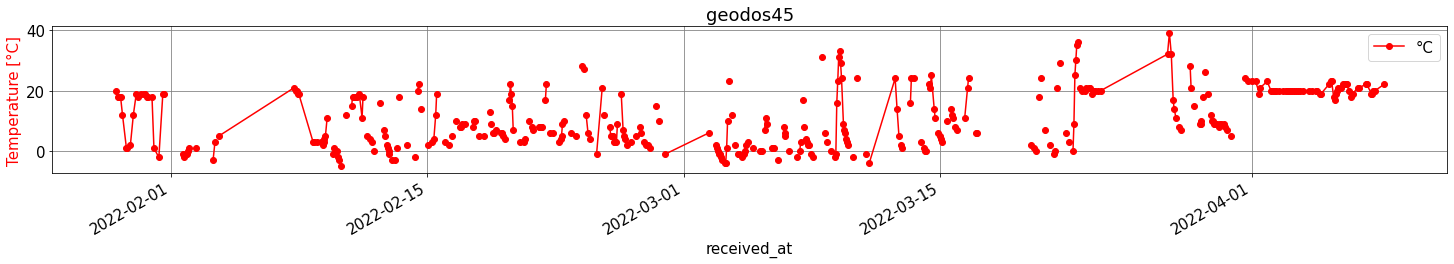

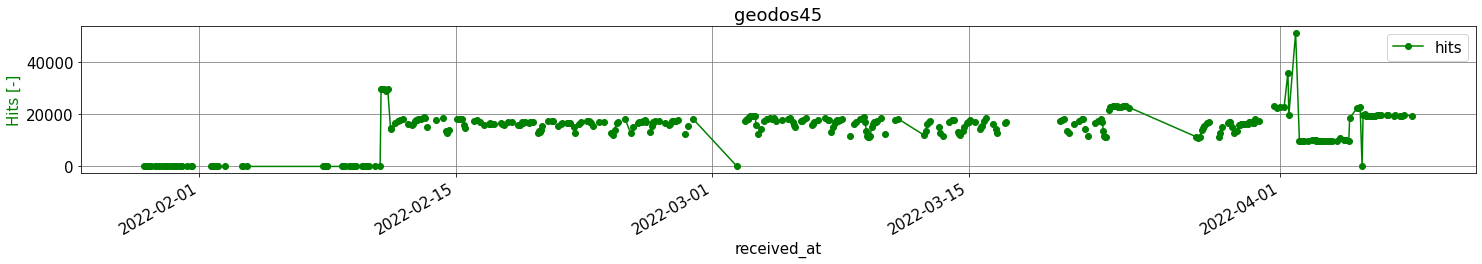

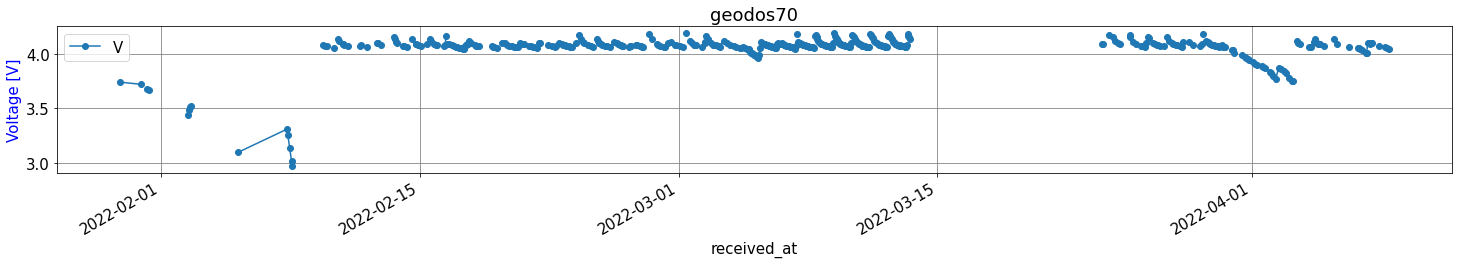

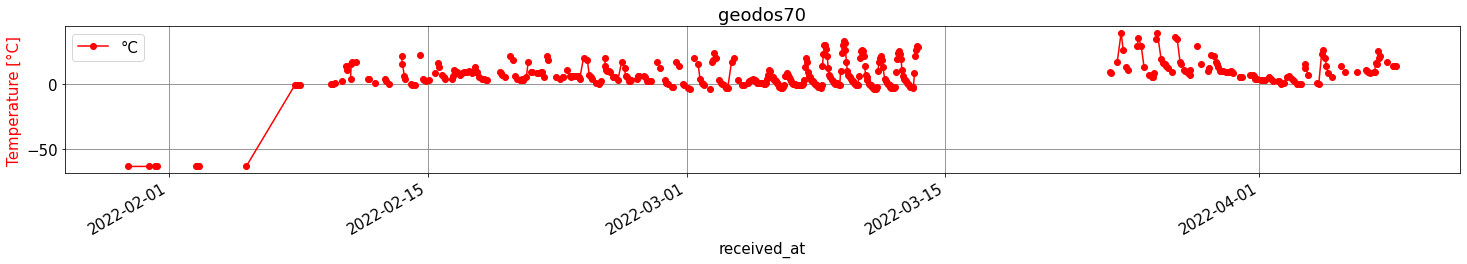

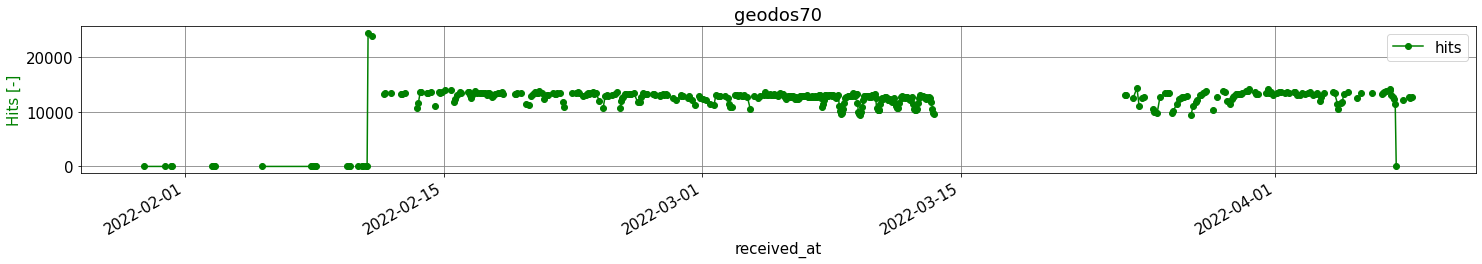

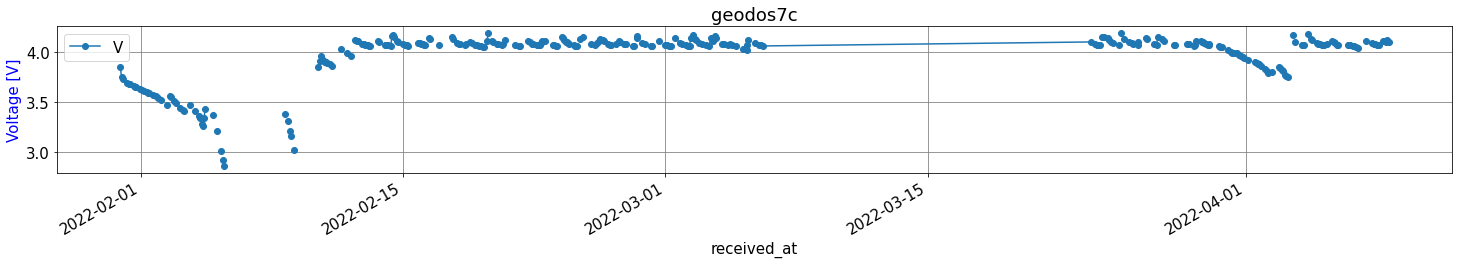

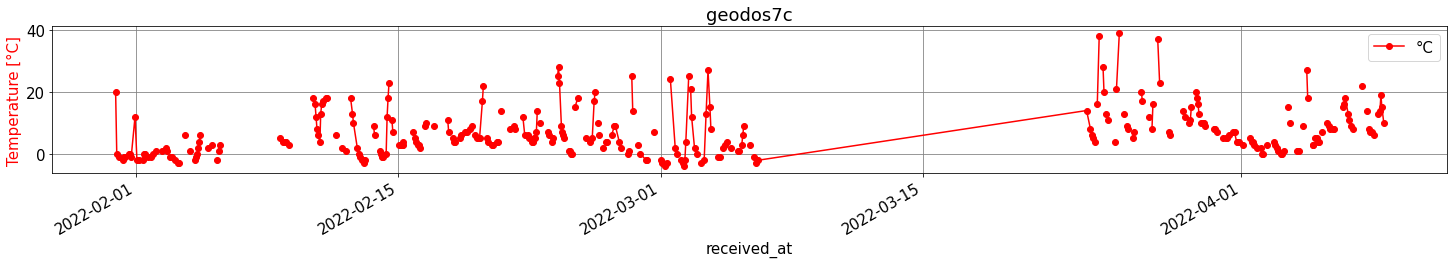

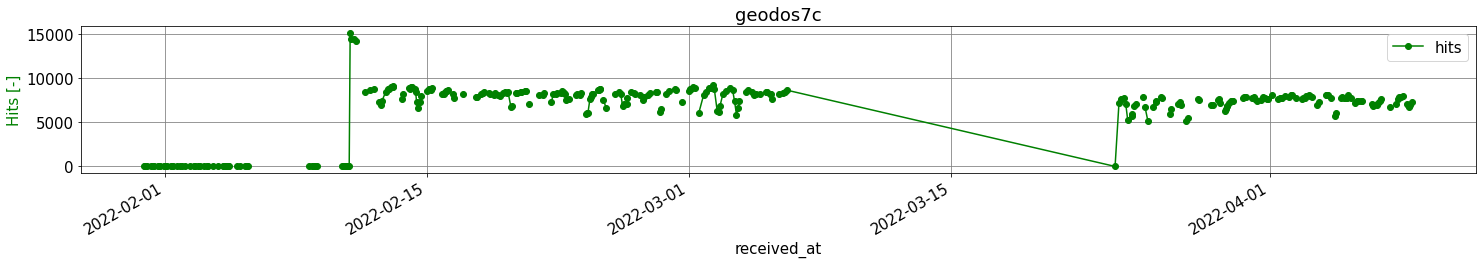

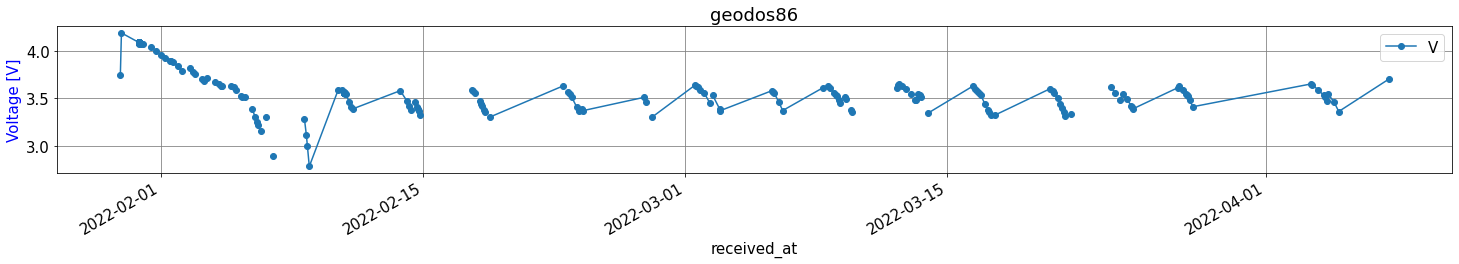

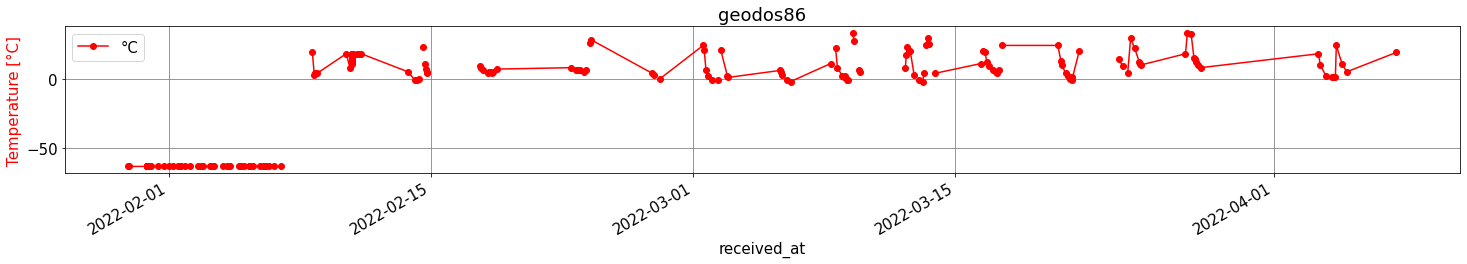

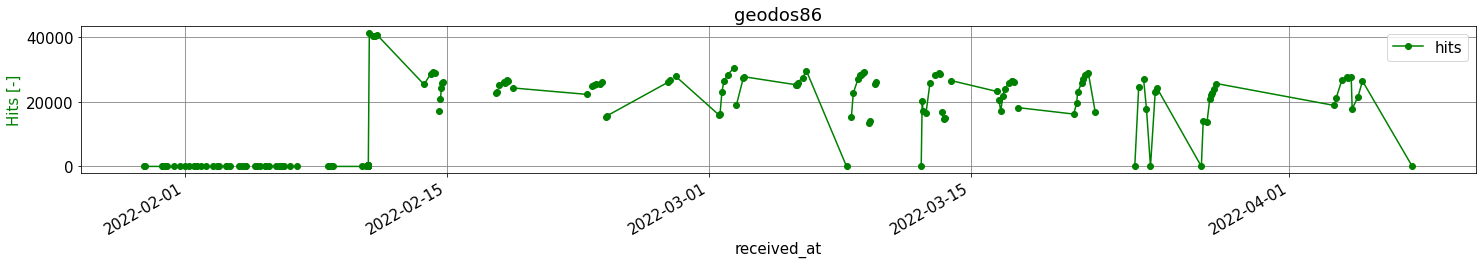

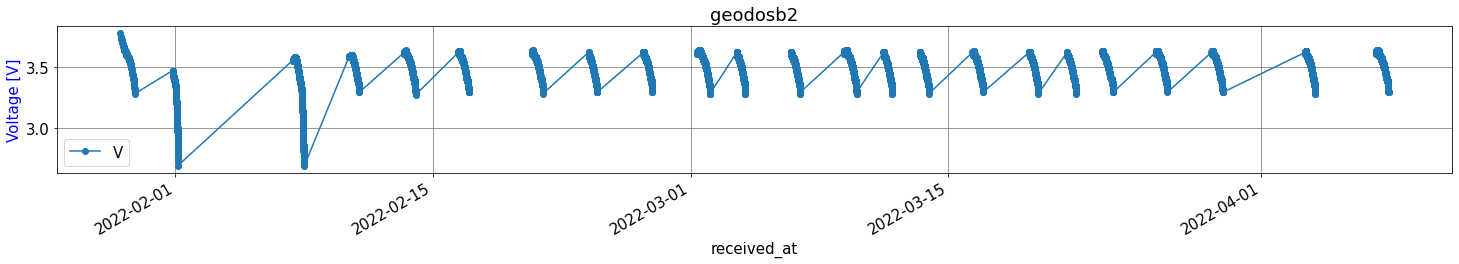

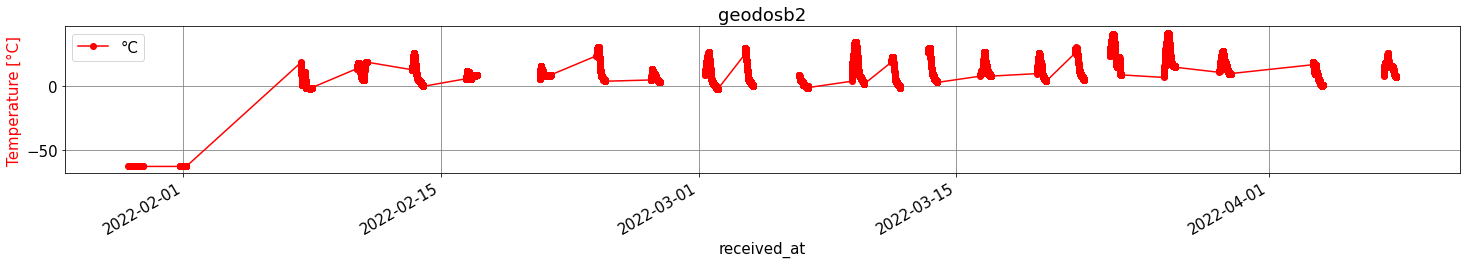

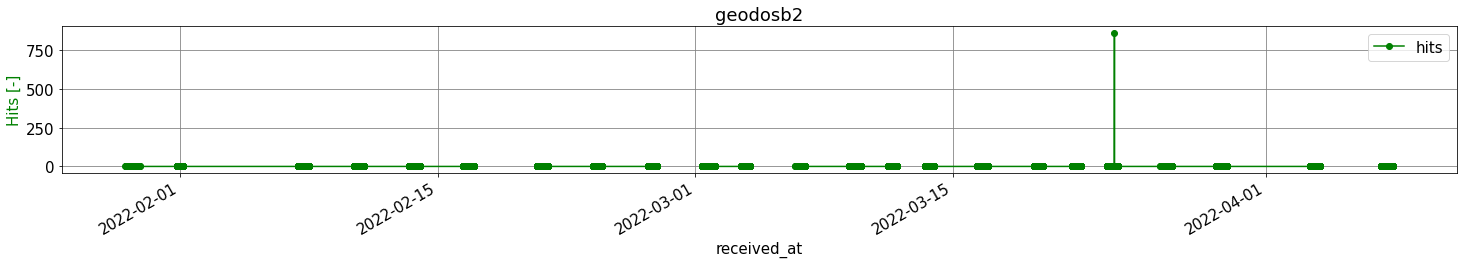

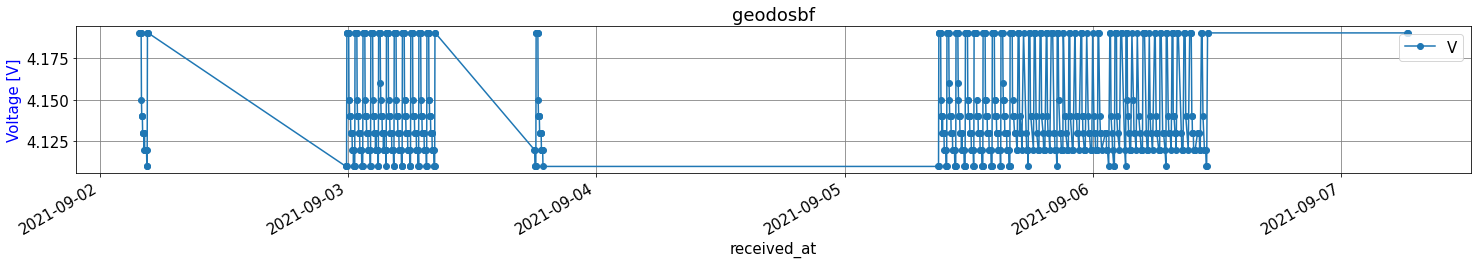

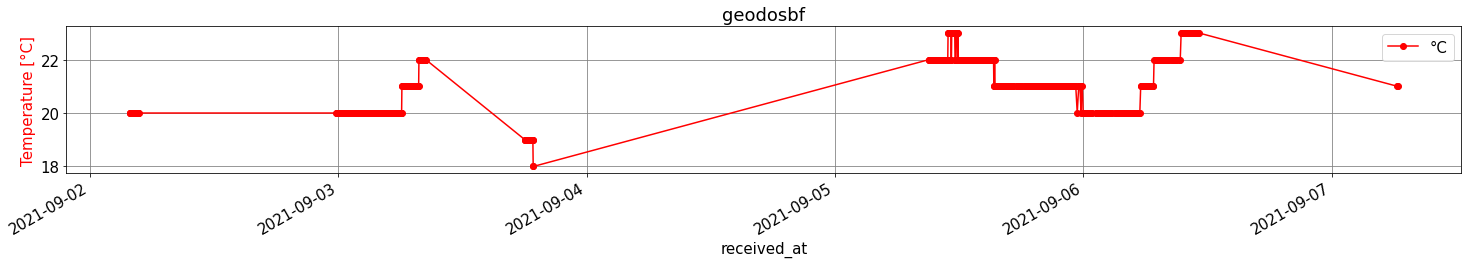

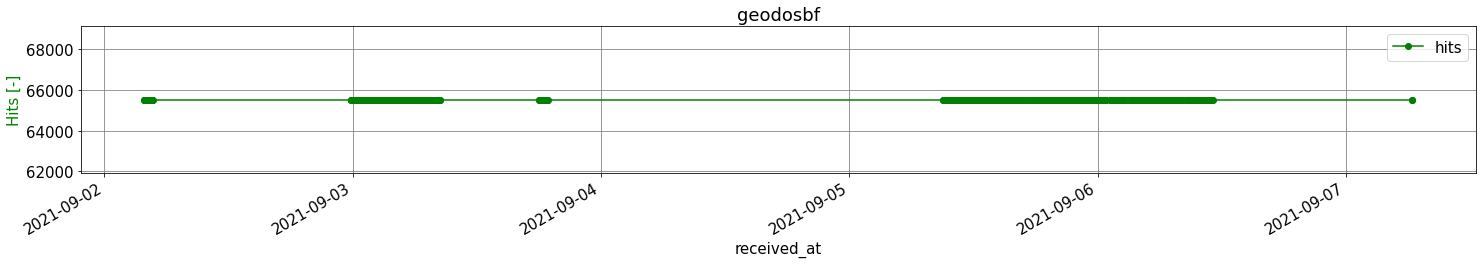

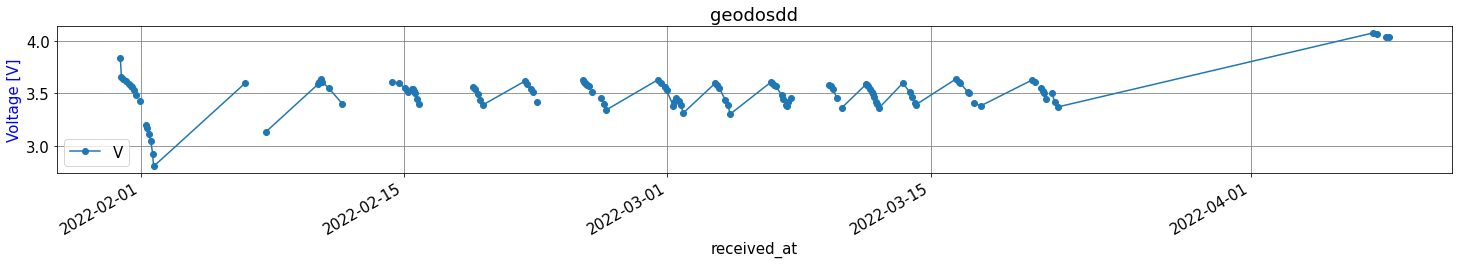

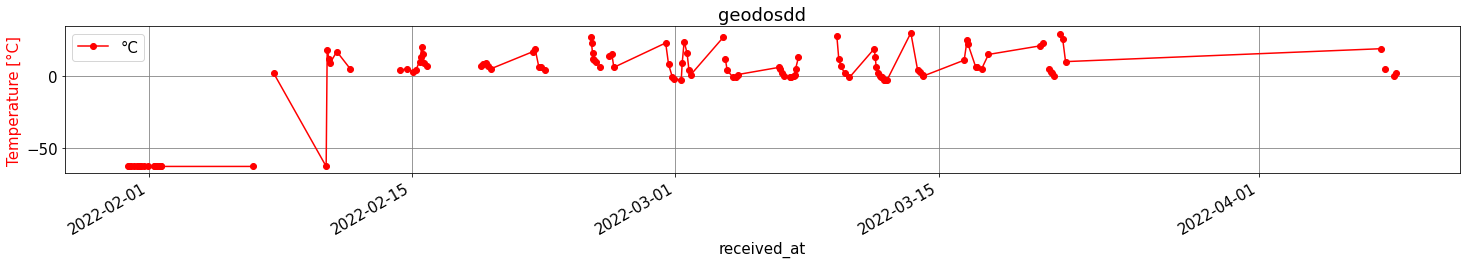

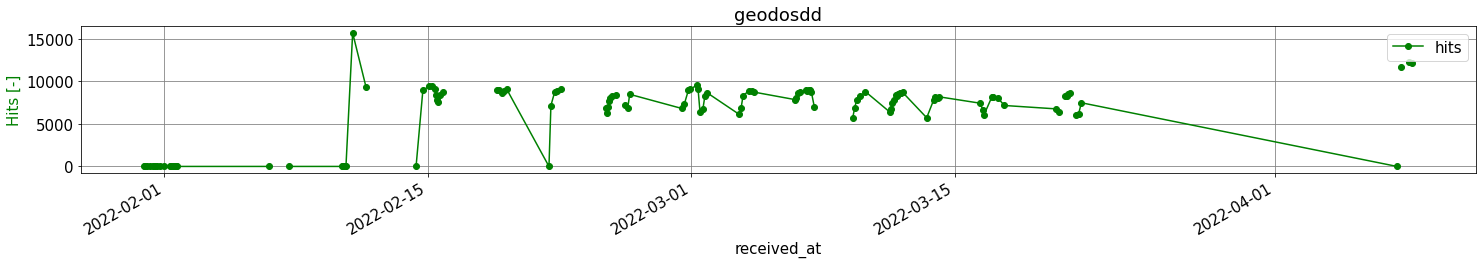

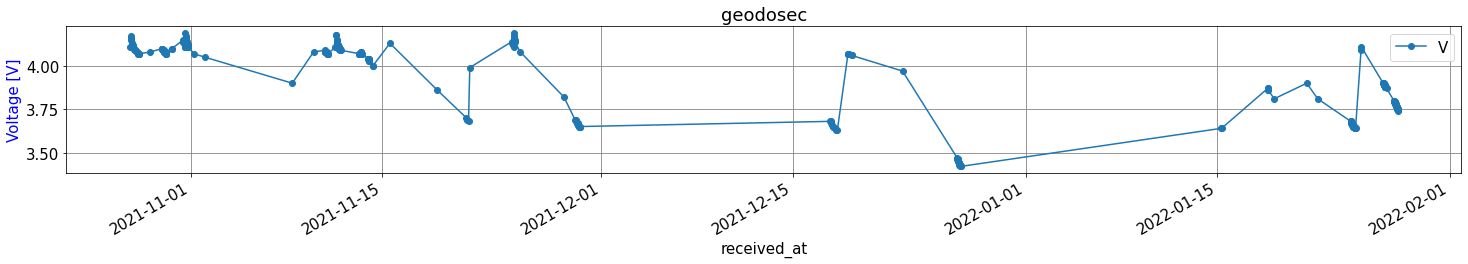

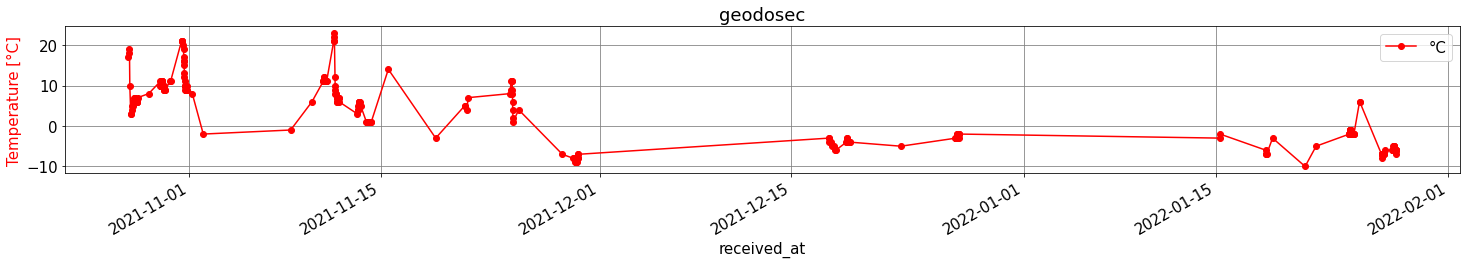

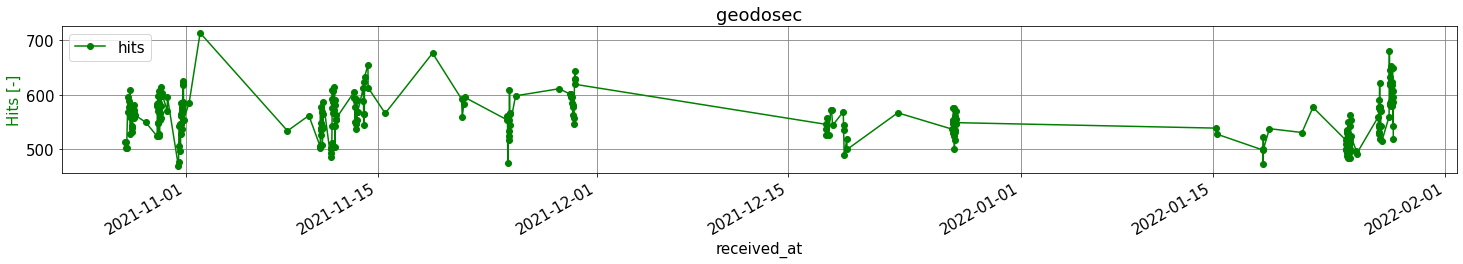

In [9]:
#plt.figure(figsize=(10,1))
#plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

# iterate over unique device IDs seen in logged messages
for dev_id in np.unique(df["device_id"]):
    # select rows from that particular device
    df_filtered = df[df["device_id"] == dev_id]
    
    # some plots...
    df_filtered.plot("received_at", "V", figsize=(25, 3), title=dev_id, marker='o')
    plt.ylabel('Voltage [V]', color='blue')
    plt.grid(b=True, which='major', color='grey', linestyle='-')
    df_filtered.plot("received_at", "°C", figsize=(25, 3), title=dev_id, color='red', marker='o')
    plt.ylabel('Temperature [°C]', color='red')
    plt.grid(b=True, which='major', color='grey', linestyle='-')
    df_filtered.plot("received_at", "hits", figsize=(25, 3), title=dev_id, color='green', marker='o')
    plt.ylabel('Hits [-]', color='green')
    plt.grid(b=True, which='major', color='grey', linestyle='-')



(18901.0, 19377.0)

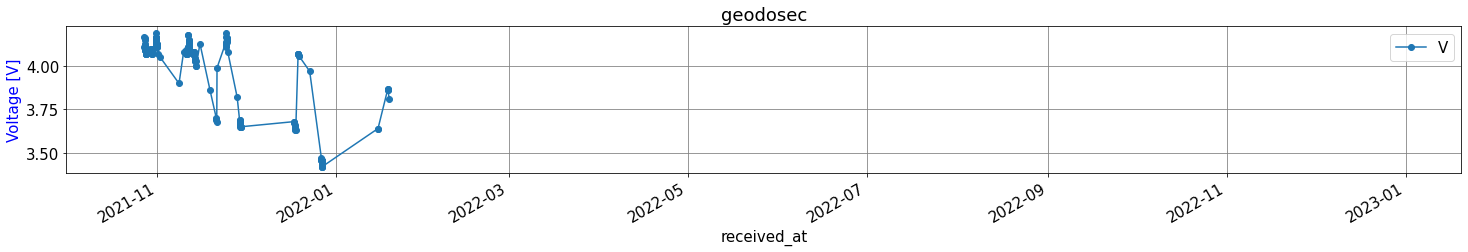

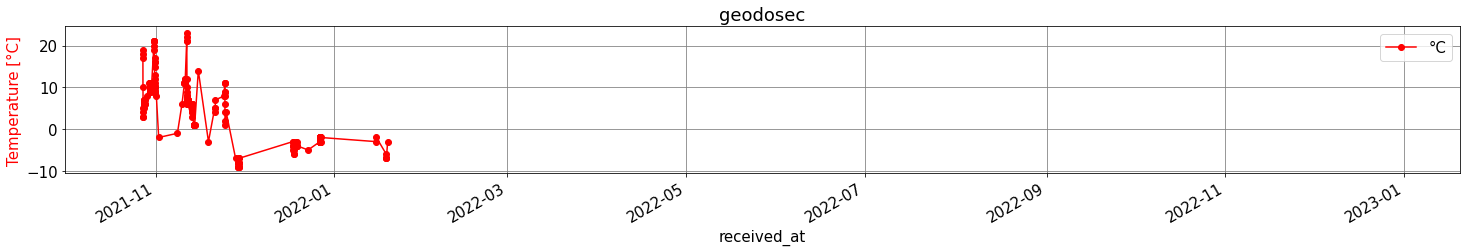

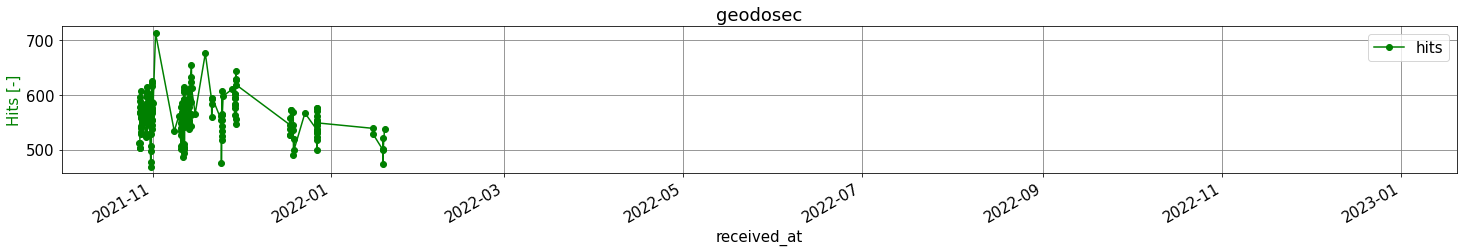

In [17]:
DEVID = 'geodosec'

FROM = '2021-10-01'
TO = '2023-01-20'

df = pd.DataFrame(payloads_from_json_log("/storage/stations/GEODOS/*.json"))
df["received_at"] = pd.to_datetime(df["received_at"])


#plt.figure(figsize=(10,1))
#plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

df_filtered = df[df["device_id"] == DEVID]

# some plots...
df_filtered.plot("received_at", "V", figsize=(25, 3), title=DEVID, marker='o')
plt.ylabel('Voltage [V]', color='blue')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.xlim(FROM,TO)
df_filtered.plot("received_at", "°C", figsize=(25, 3), title=DEVID, color='red', marker='o')
plt.ylabel('Temperature [°C]', color='red')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.xlim(FROM,TO)
df_filtered.plot("received_at", "hits", figsize=(25, 3), title=DEVID, color='green', marker='o')
plt.ylabel('Hits [-]', color='green')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.xlim(FROM,TO)
